In [1]:
from scipy.optimize import minimize, NonlinearConstraint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from PIL import Image,ImageFilter

In [2]:
data = pd.read_csv("dataset_alphanum.csv")
data.columns =  [i for i in range(28*28+1)]
data = data[data.iloc[:, -1].isin(["A", "B", "C", "D", "E", "F", "G", "H", "I", "J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X", "Y", "Z"])]
groups = data.groupby(784)
myAlphas = pd.read_csv("myAlphas.csv")

In [3]:
#为了平衡各个字母的数据量，每个字母取前20个样本作为训练集
train = pd.DataFrame()
test = pd.DataFrame()

alphas = data[784].unique()
alphas_combine = list(combinations(alphas, 2))

for label in alphas:
    data_ = groups.get_group(label)
    train = pd.concat([train, data_.iloc[:25, :]], ignore_index=True)
    test = pd.concat([test, data_.iloc[25:, :]], ignore_index=True)

In [7]:
def match_2(label1, label2):
    train_ = train[train.iloc[:, -1].isin([label1, label2])]
    test_ = test[test.iloc[:, -1].isin([label1, label2])]

    x_train = train_.iloc[:, :-1].values
    y_train = np.where(train_.iloc[:, -1] == label1, 1, -1)

    def objective_function(w):
        return 0.5 * np.dot(w[:784], w[:784])

    # Use a single NonlinearConstraint for all samples
    def constraint(w):
        return np.array([y * (np.dot(w[:784], xi) + w[784]) for y, xi in zip(y_train, x_train)])

    constraints = [NonlinearConstraint(constraint, 1, np.inf)]

    initial_guess = np.zeros(x_train.shape[1] + 1)

    result = minimize(objective_function, initial_guess, method='SLSQP', constraints=constraints)
    return result

In [8]:
def resize_image(input_path, output_path, target_size):
    with Image.open(input_path) as img:
        img = img.filter(ImageFilter.SHARPEN)
        resized_img = img.resize(target_size)
        sharpened_img = resized_img.filter(ImageFilter.SHARPEN)
        sharpened_img.save(output_path,quality=100)
def image_to_matrix(image_path):
    img = Image.open(image_path)
    img = img.convert('L')
    img_matrix = np.array(img)
    return img_matrix

In [9]:
res = pd.DataFrame(columns=alphas)
res["true"] = test.iloc[:, -1].values
for label in alphas:
    res[label] = 0
SVMS = []
for labels in alphas_combine:
    label1 = labels[0]
    label2 = labels[1]
    res_ = match_2(label1, label2)
    SVMS.append(res_)
    x = test.iloc[:, :-1].values
    y_pred = np.where(np.dot(x, res_.x[:784]) + res_.x[784] > 0, 1, -1)
    #若判定为label1，res中对应位置+1
    res[label1] = res[label1] + np.where(y_pred == 1, 1, 0)
    res[label2] = res[label2] + np.where(y_pred == -1, 1, 0)
    print("正在构建",label1,label2,"的SVM")

正在构建 A B 的SVM
正在构建 A C 的SVM
正在构建 A D 的SVM
正在构建 A E 的SVM
正在构建 A F 的SVM
正在构建 A G 的SVM
正在构建 A H 的SVM
正在构建 A I 的SVM
正在构建 A J 的SVM
正在构建 A K 的SVM
正在构建 A L 的SVM
正在构建 A M 的SVM
正在构建 A N 的SVM
正在构建 A O 的SVM
正在构建 A P 的SVM
正在构建 A Q 的SVM
正在构建 A R 的SVM
正在构建 A S 的SVM
正在构建 A T 的SVM
正在构建 A U 的SVM
正在构建 A V 的SVM
正在构建 A W 的SVM
正在构建 A X 的SVM
正在构建 A Y 的SVM
正在构建 A Z 的SVM
正在构建 B C 的SVM
正在构建 B D 的SVM
正在构建 B E 的SVM
正在构建 B F 的SVM
正在构建 B G 的SVM
正在构建 B H 的SVM
正在构建 B I 的SVM
正在构建 B J 的SVM
正在构建 B K 的SVM
正在构建 B L 的SVM
正在构建 B M 的SVM
正在构建 B N 的SVM
正在构建 B O 的SVM
正在构建 B P 的SVM
正在构建 B Q 的SVM
正在构建 B R 的SVM
正在构建 B S 的SVM
正在构建 B T 的SVM
正在构建 B U 的SVM
正在构建 B V 的SVM
正在构建 B W 的SVM
正在构建 B X 的SVM
正在构建 B Y 的SVM
正在构建 B Z 的SVM
正在构建 C D 的SVM
正在构建 C E 的SVM
正在构建 C F 的SVM
正在构建 C G 的SVM
正在构建 C H 的SVM
正在构建 C I 的SVM
正在构建 C J 的SVM
正在构建 C K 的SVM
正在构建 C L 的SVM
正在构建 C M 的SVM
正在构建 C N 的SVM
正在构建 C O 的SVM
正在构建 C P 的SVM
正在构建 C Q 的SVM
正在构建 C R 的SVM
正在构建 C S 的SVM
正在构建 C T 的SVM
正在构建 C U 的SVM
正在构建 C V 的SVM
正在构建 C W 的SVM
正在构建 C X 的SVM
正在构建 C Y 的SVM
正在构建 C

In [4]:
#使用sklearn的SVM
clf = SVC(kernel="linear", C=1)
clf.fit(train.iloc[:, :-1], train.iloc[:, -1])
y_pred = clf.predict(test.iloc[:, :-1])
#使用skleran计算准确率
print("sklearn SVM准确率：", accuracy_score(test.iloc[:, -1], y_pred))

sklearn SVM准确率： 0.8158253751705321


In [ ]:
#计算准确率
count = 0
res["guess"] = res.iloc[:, :-1].idxmax(axis=1)
for i in range(res.shape[0]):
    if res.iloc[i, -1] == res.iloc[i, -2]:
        count += 1
print(f"训练数据准确率为：{count/res.shape[0]}")

训练数据准确率为：0.7953615279672579


Text(0.5, 1.0, 'accuracy of each alphas')

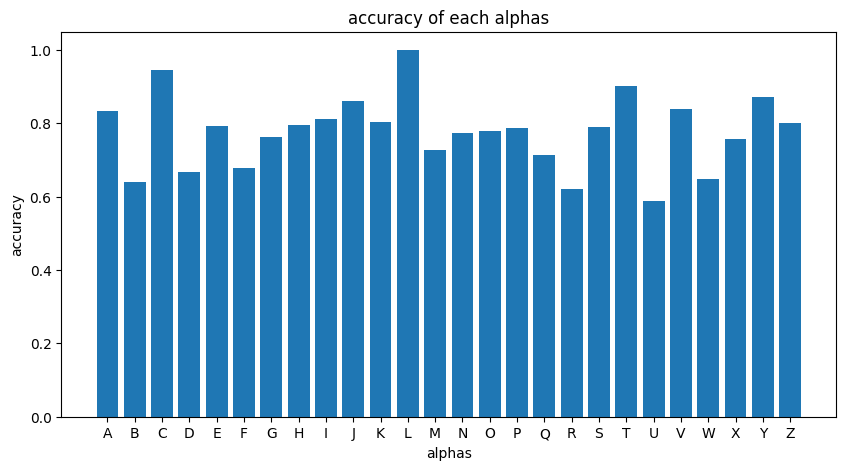

In [ ]:
group_alphas = res.groupby("true")
#计算每个字母的准确率
acc = []
for label in alphas:
    data_ = group_alphas.get_group(label)
    count = 0
    for i in range(data_.shape[0]):
        if data_.iloc[i, -1] == data_.iloc[i, -2]:
            count += 1
    acc.append(count/data_.shape[0])
#绘制柱状图
plt.figure(figsize=(10, 5))
plt.bar(alphas, acc)
plt.xlabel("alphas")
plt.ylabel("accuracy")
plt.title("accuracy of each alphas")

In [ ]:
def apply(alpha):
    predict = pd.DataFrame(columns=alphas)
    predict["combines"] = alphas_combine
    for label in alphas:
        predict[label] = 0

    test_x = myAlphas[myAlphas["label"] == alpha].values[0][:-1]
    img_matrix = test_x.reshape(28, 28)
    img_matrix = img_matrix.astype(float)  # 将 object 类型转换为 float 类型
    test_x = test_x.reshape(1, -1)
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img_matrix, cmap='gray')
    y_pred = clf.predict(test_x)
    sk_pre = y_pred
    plt.title("sklearn "+y_pred[0])
    for i in range(len(alphas_combine)):

        label1 = alphas_combine[i][0]
        label2 = alphas_combine[i][1]

        res_ = SVMS[i].x
        y_pred = np.where(np.dot(test_x, res_[:784]) + res_[784] > 0, 1, -1)
        if (y_pred == 1):
            predict.loc[i, label1] += 1
        else:
            predict.loc[i, label2] += 1
    result = {}
    for label in alphas:
        result[label] = 0
    for i in range(predict.shape[0]):
        result[predict.iloc[i, :-1].astype(float).idxmax(axis=0)] += 1
    pre = pd.DataFrame(result, index=[0])
    #以列名为x轴，值为y轴绘制柱状图
    plt.subplot(1, 2, 2)
    plt.bar(pre.columns, pre.iloc[0, :])
    #值最高的柱子颜色设置为红色
    plt.bar(pre.iloc[0, :].idxmax(axis=0), pre.iloc[0, :].max(), color="red")
    my_pred = pre.iloc[0, :].idxmax(axis=0)
    plt.title("me "+ pre.iloc[0, :].idxmax(axis=0))
    plt.xlabel("alphas")
    plt.ylabel("count")

    return sk_pre, my_pred

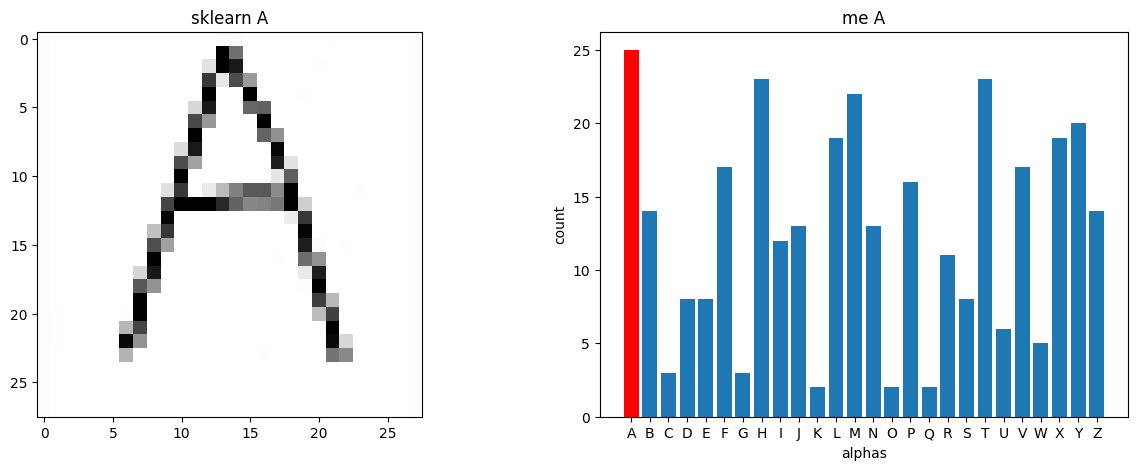

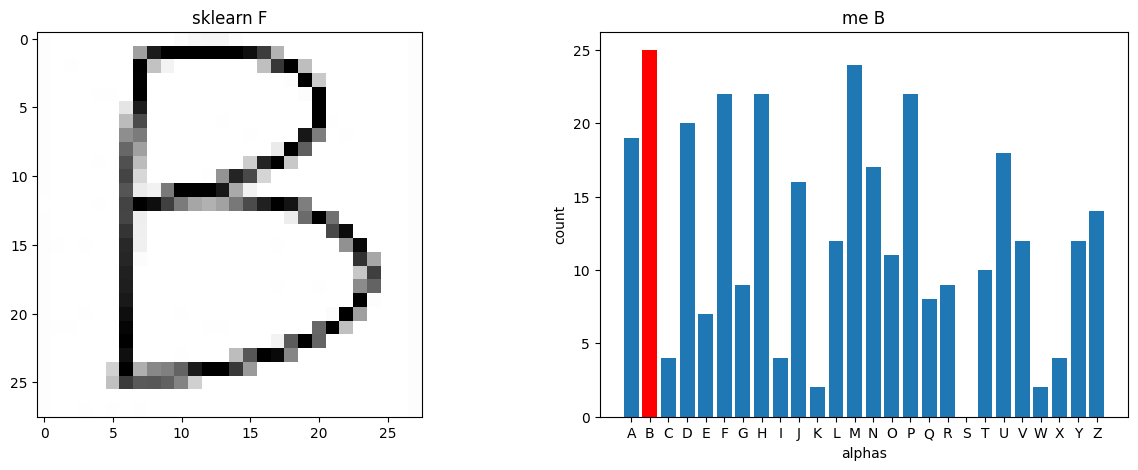

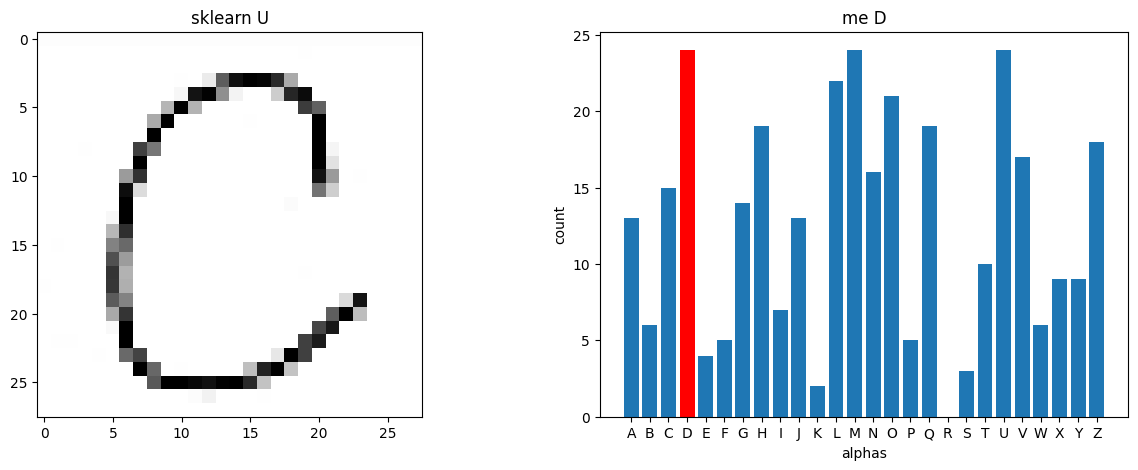

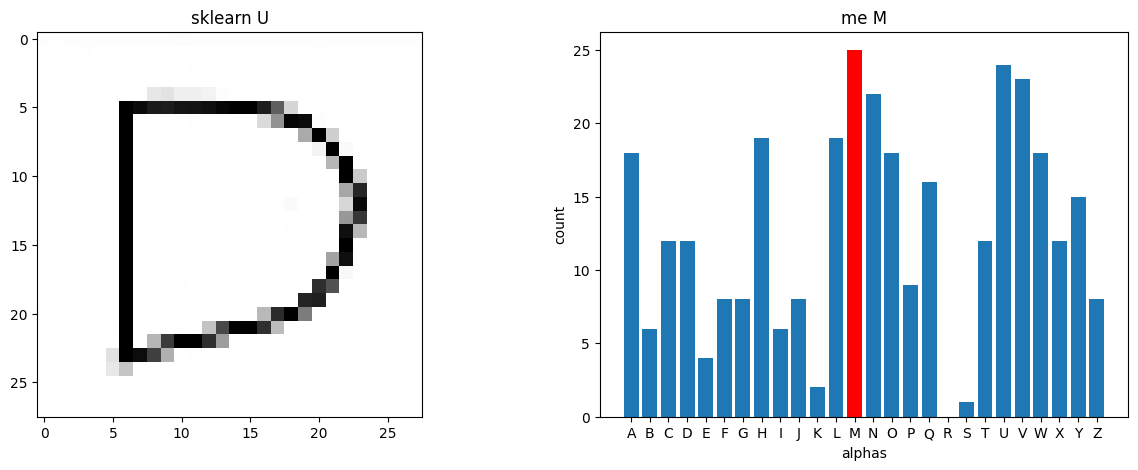

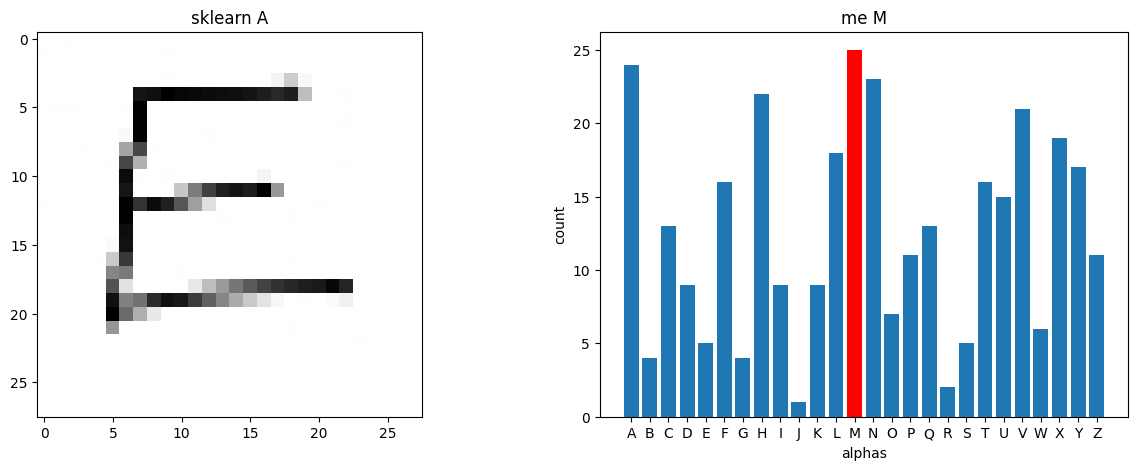

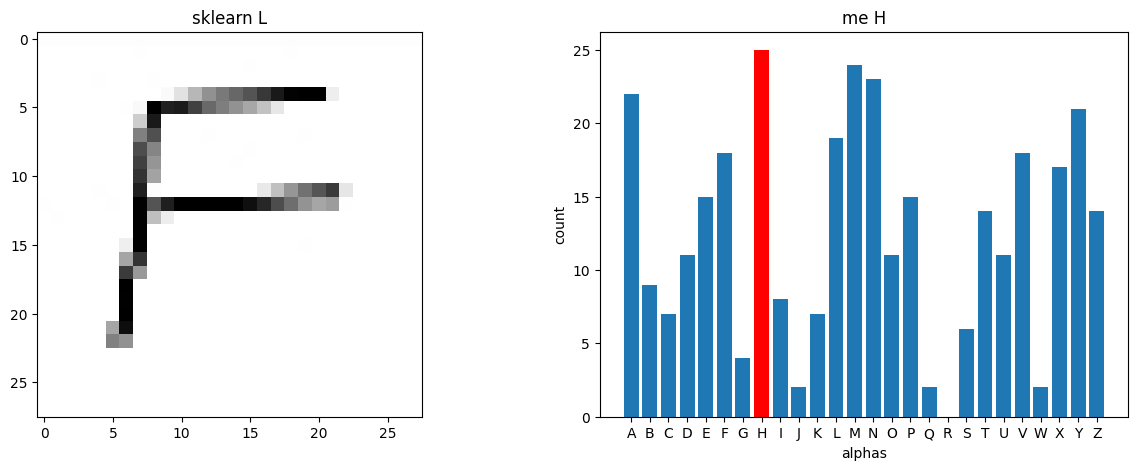

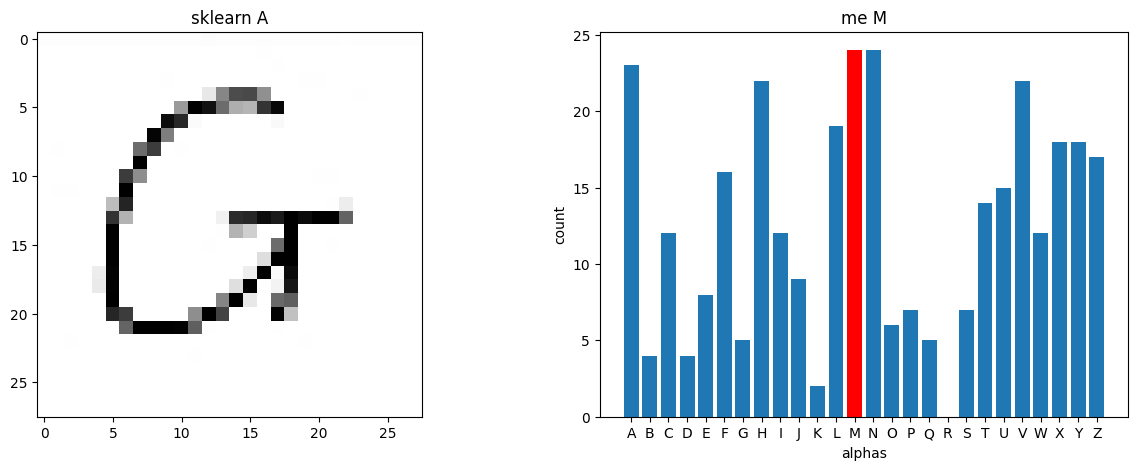

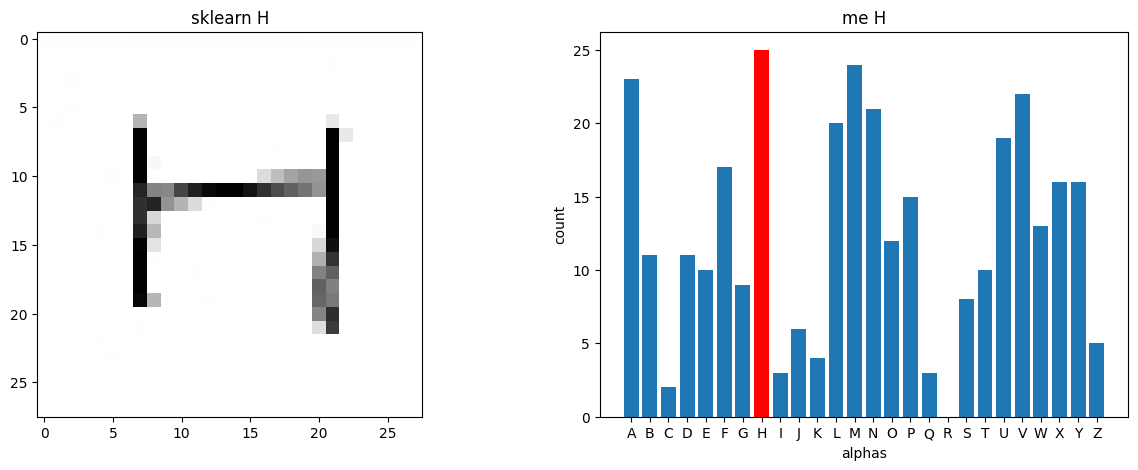

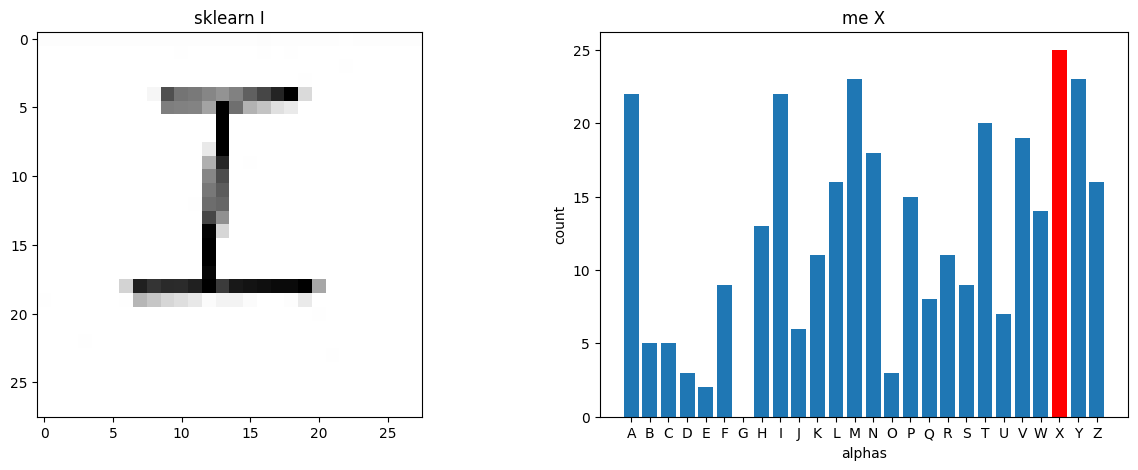

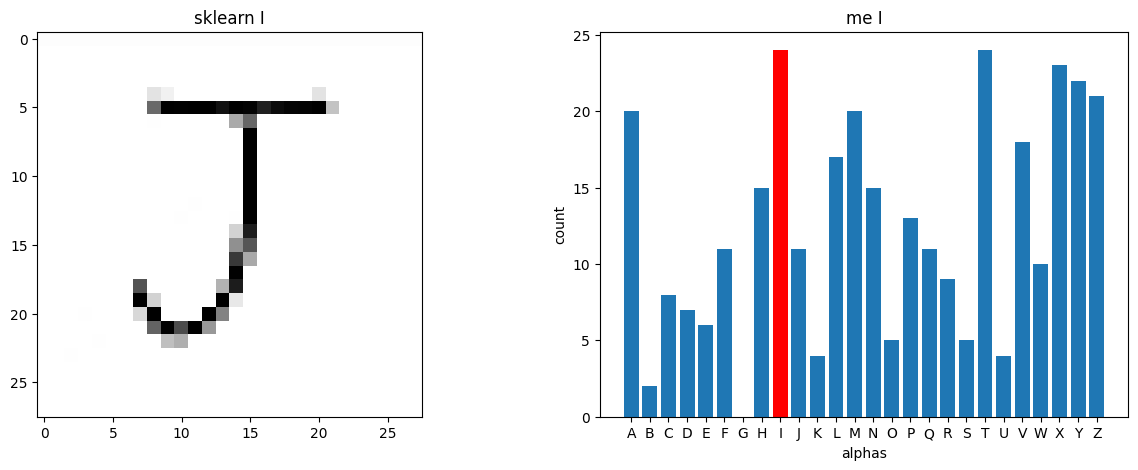

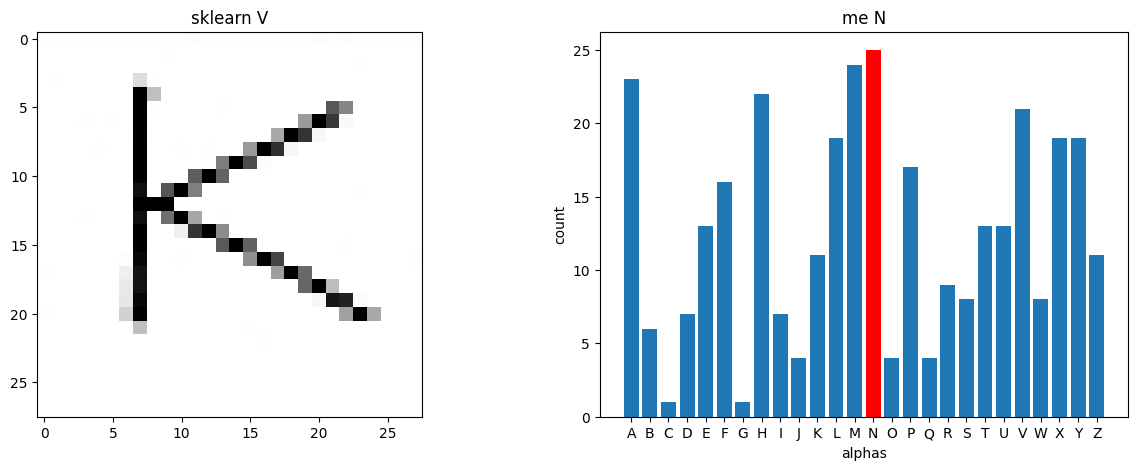

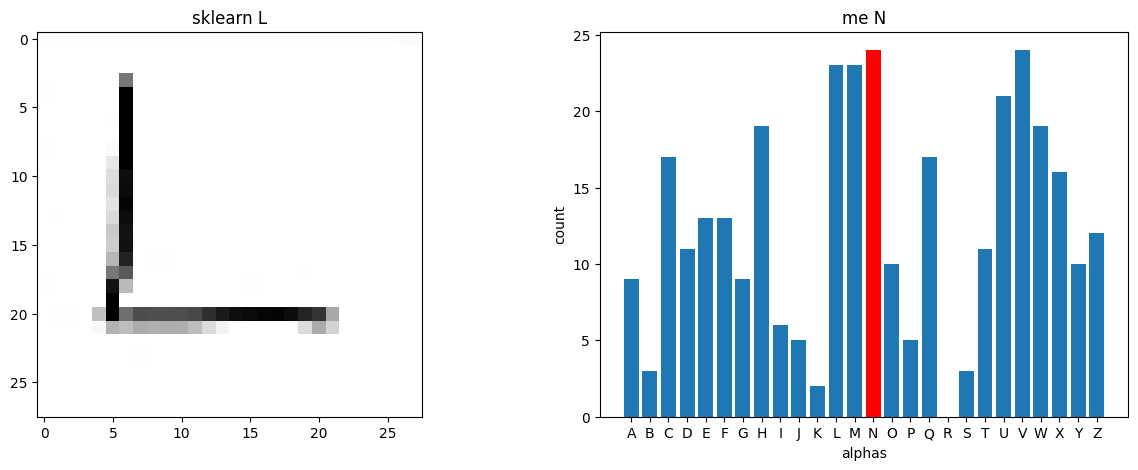

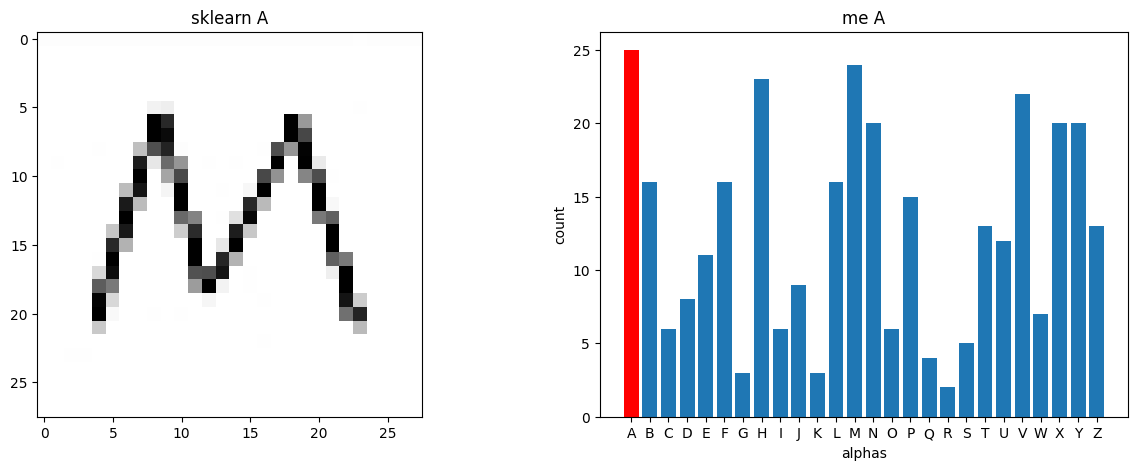

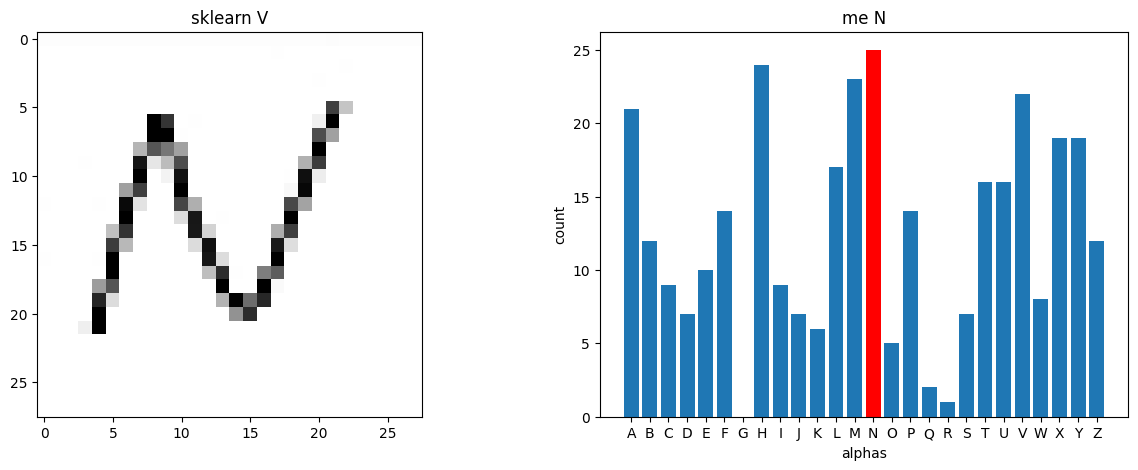

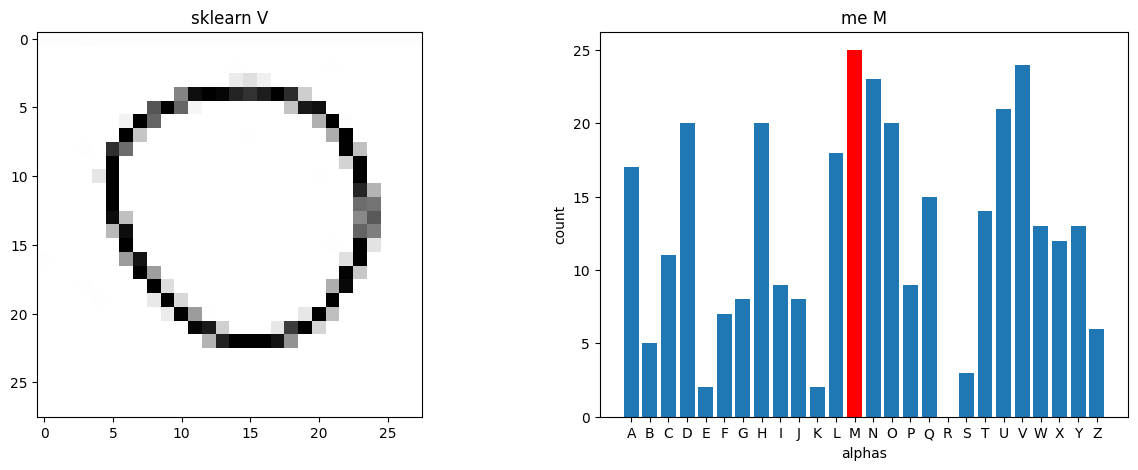

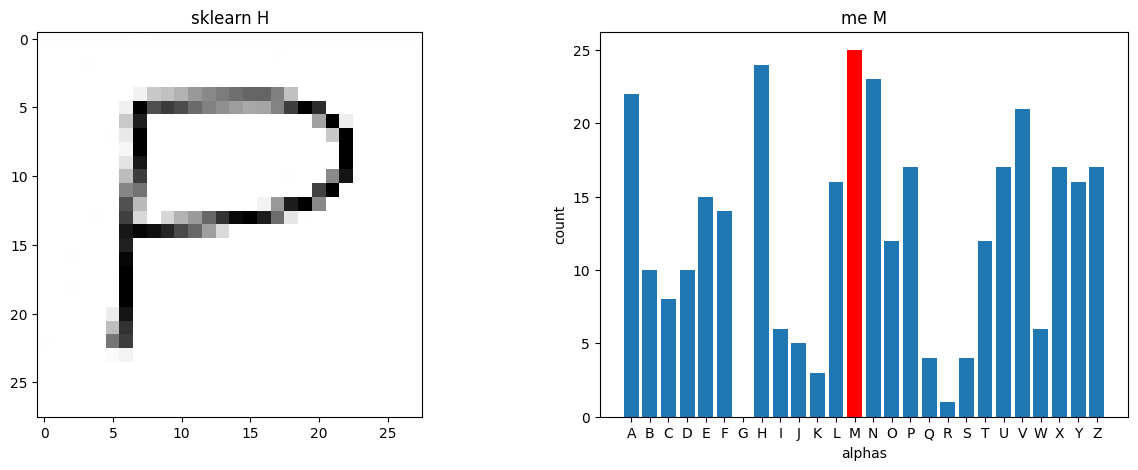

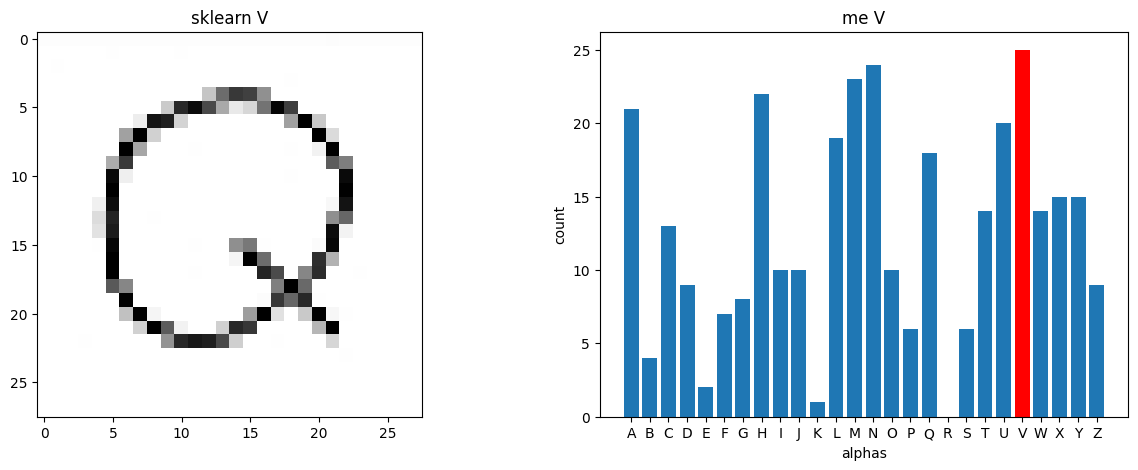

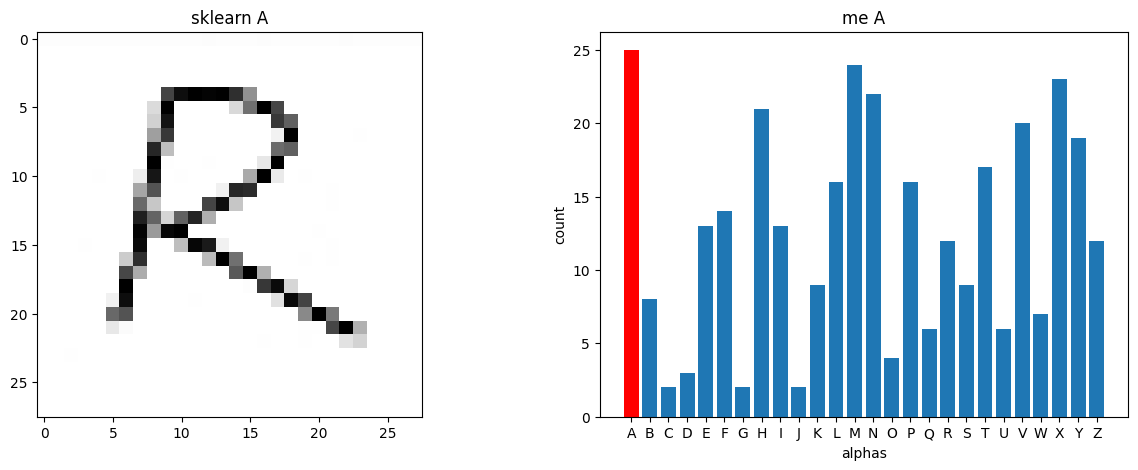

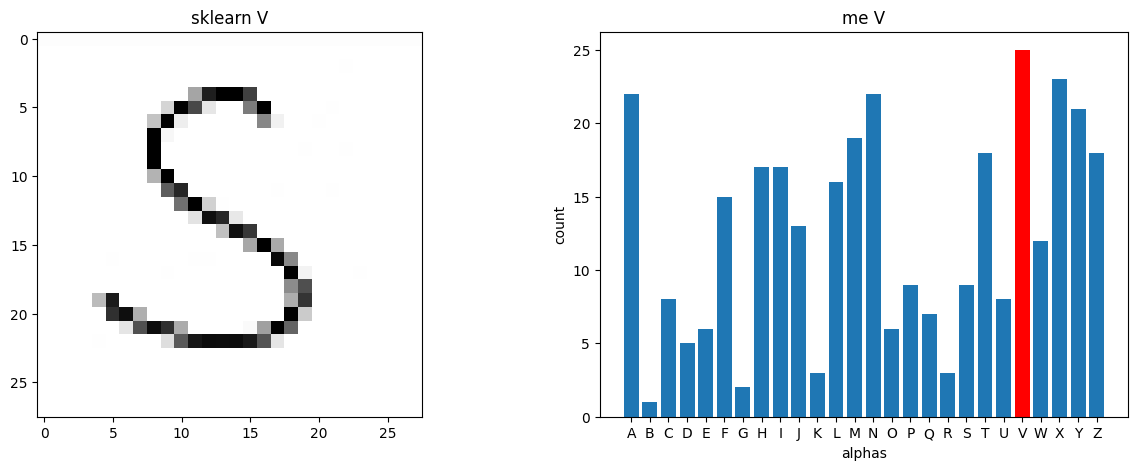

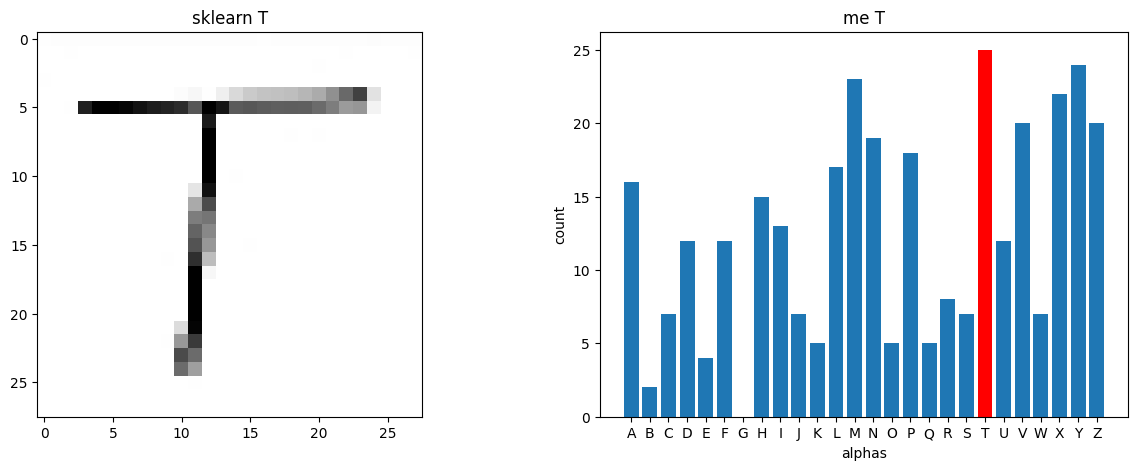

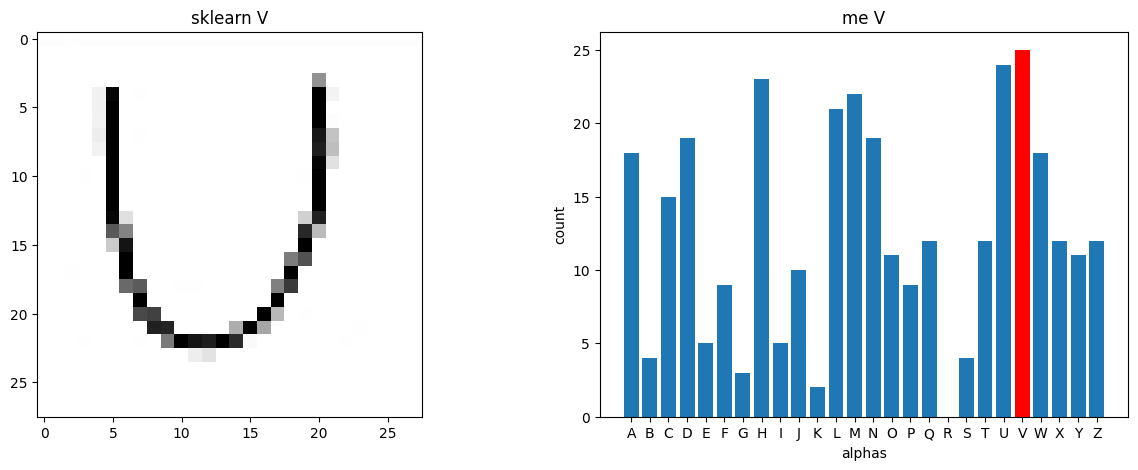

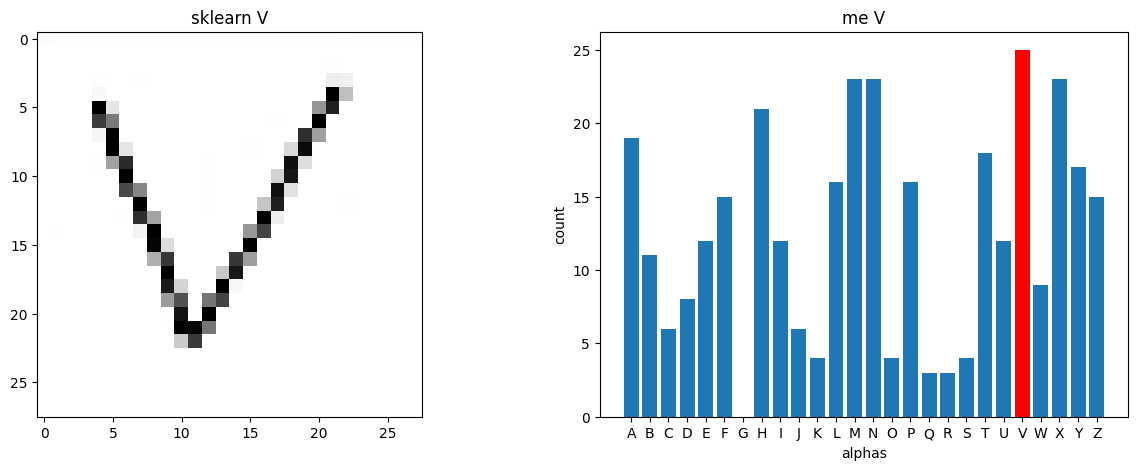

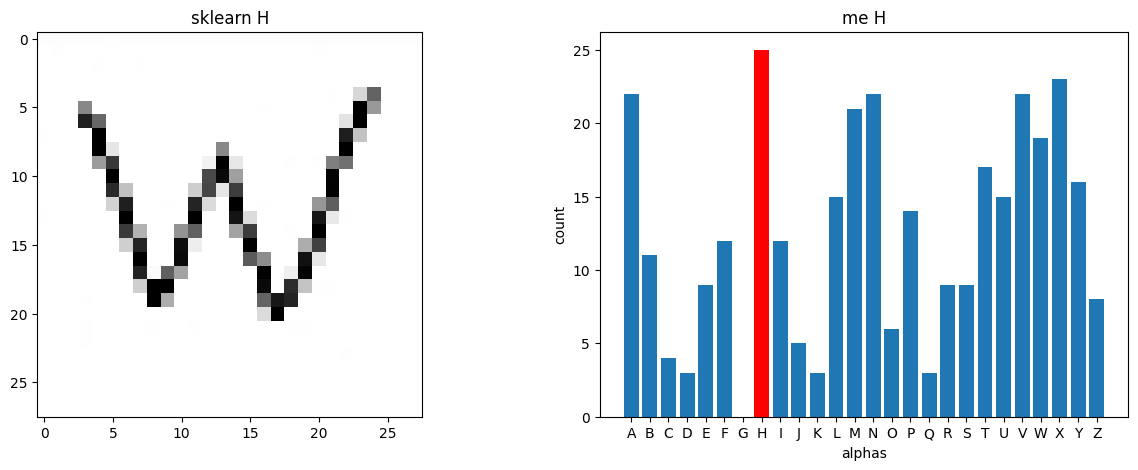

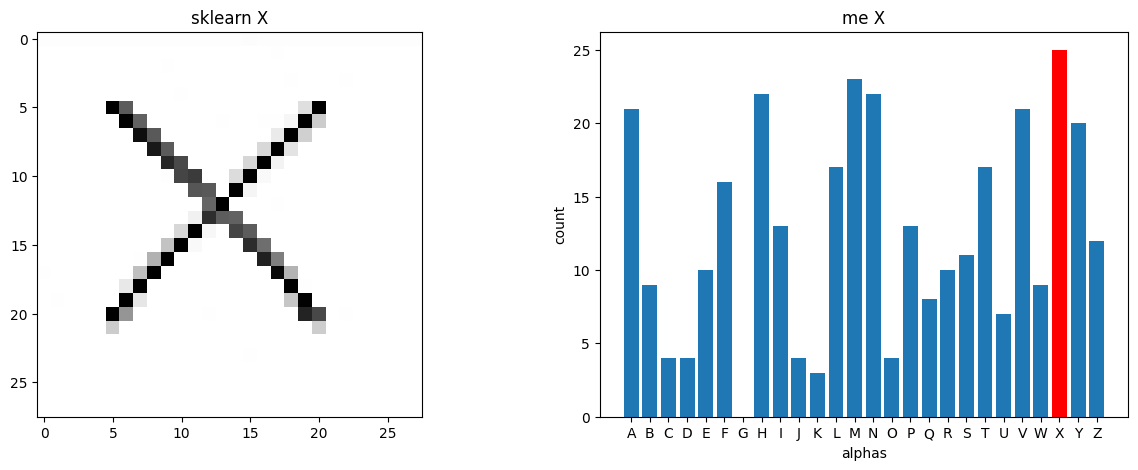

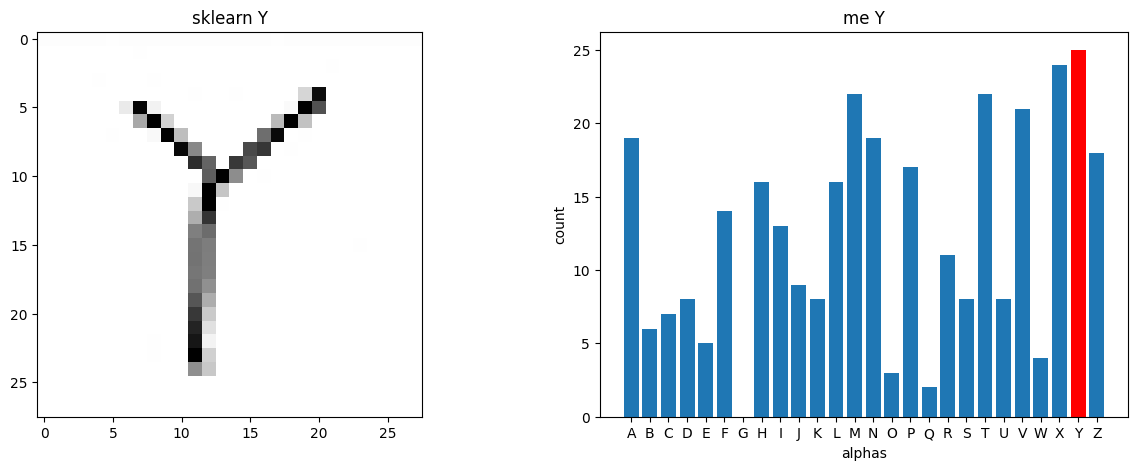

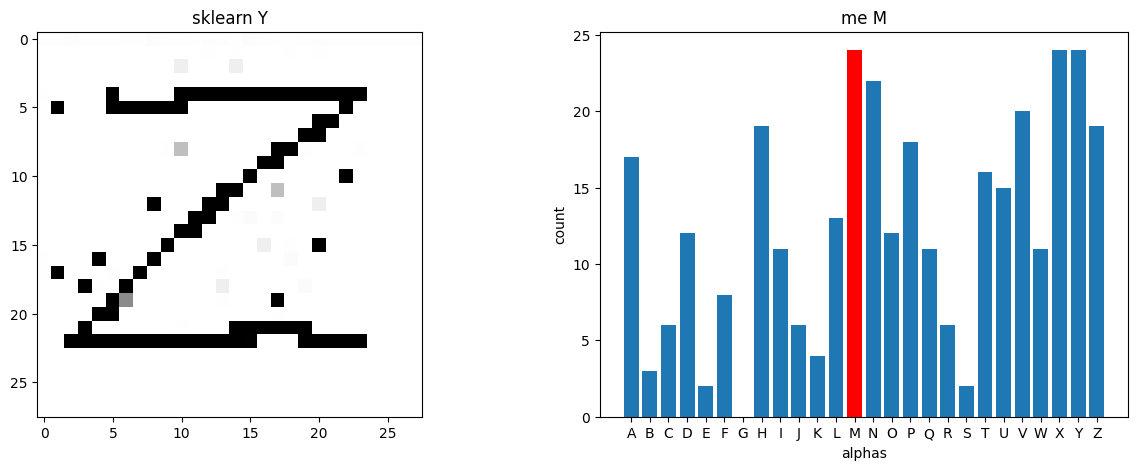

In [ ]:
sk_rate = 0
my_rate = 0
same = 0
for i in alphas:
    P = i
    sk_pre, my_pred = apply(P)
    if sk_pre == i:
        sk_rate += 1
    if my_pred == i:
        my_rate += 1
    if sk_pre == my_pred:
        same += 1
    plt.show()

In [ ]:
print("sklearn准确率：",sk_rate/len(alphas))
print("我准确率：",my_rate/len(alphas))
print("我与sklearn预测相同率：",same/len(alphas))

sklearn准确率： 0.3076923076923077
我准确率： 0.3076923076923077
我与sklearn预测相同率： 0.5
